# Decline curve analysis(Monthly data)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#original production data
df=pd.read_excel("Volve production data C.xlsx",sheet_name=2)
df.rename(columns = {'Oil':'oil'}, inplace = True)
df

,Period,oil
0,2008-02-01,49091.06
1,2008-03-01,83361.26
2,2008-04-01,74532.45
3,2008-05-01,125478.56
4,2008-06-01,143786.85
...,...,...
76,2014-06-01,5751.20
77,2014-07-01,5791.84
78,2014-08-01,4448.49
79,2014-09-01,5062.59


In [4]:
# Get the number of rows in the DataFrame using shape attribute
num_rows = df.shape[0]
print("Number of rows in DataFrame:", num_rows)

Number of rows in DataFrame: 81


In [5]:
row_number = df.index[df['Period'] == '2010-02-01'].tolist()[0]
row = df.iloc[row_number]
print("Row number:", row_number)
print("Row data:\n", row)

Row number: 24
Row data:
 Period    2010-02-01 00:00:00
oil                  103026.0
Name: 24, dtype: object


# INPUT

In [7]:
#Initial date of production data
Date="2008-02-01"

#prediction start
Ps=row_number+1

#final production data available
Fp=num_rows 

#Intitial production rate
I=103026.0

#Total MONTHS incluinding prediction
T=Ps+150 

#Months required to Predict after last production
Mp=(T-Fp)


#total months of Decline
D=(Fp-Ps)+1
D
Ps

25

In [8]:
def generate_monthly_dates(initial_date, num_dates):

    # Convert initial_date to datetime if it's a string
    if isinstance(initial_date, str):
        initial_date = pd.to_datetime(initial_date)

    # Generate monthly dates starting from the initial_date
    monthly_dates = pd.date_range(start=initial_date, periods=num_dates, freq='MS')

    # Create a DataFrame from the monthly_dates
    df_dates = pd.DataFrame({'month': monthly_dates})

    return df_dates

# Example usage
initial_date = Date  # Initial date in 'YYYY-MM-DD' format
num_dates = T  # Number of monthly dates to generate

# Generate the DataFrame of monthly dates
monthly_dates_df = generate_monthly_dates(initial_date, num_dates)

# Print the generated DataFrame
print(monthly_dates_df)

         month
0   2008-02-01
1   2008-03-01
2   2008-04-01
3   2008-05-01
4   2008-06-01
..         ...
170 2022-04-01
171 2022-05-01
172 2022-06-01
173 2022-07-01
174 2022-08-01

[175 rows x 1 columns]


In [9]:
z= df['oil']
#initial production data from decline
df["Oil"]=z
df.loc[Ps:,'Oil']=np.nan

s=monthly_dates_df
a = pd.concat([s,df], axis=1)
a

,month,Period,oil,Oil
0,2008-02-01,2008-02-01,49091.06,49091.06
1,2008-03-01,2008-03-01,83361.26,83361.26
2,2008-04-01,2008-04-01,74532.45,74532.45
3,2008-05-01,2008-05-01,125478.56,125478.56
4,2008-06-01,2008-06-01,143786.85,143786.85
...,...,...,...,...
170,2022-04-01,NaT,NaN,NaN
171,2022-05-01,NaT,NaN,NaN
172,2022-06-01,NaT,NaN,NaN
173,2022-07-01,NaT,NaN,NaN


In [10]:
#final production data from decline
a["HOP"]=z
a.loc[0:Ps-1,'HOP']=np.nan
a

,month,Period,oil,Oil,HOP
0,2008-02-01,2008-02-01,49091.06,49091.06,NaN
1,2008-03-01,2008-03-01,83361.26,83361.26,NaN
2,2008-04-01,2008-04-01,74532.45,74532.45,NaN
3,2008-05-01,2008-05-01,125478.56,125478.56,NaN
4,2008-06-01,2008-06-01,143786.85,143786.85,NaN
...,...,...,...,...,...
170,2022-04-01,NaT,NaN,NaN,NaN
171,2022-05-01,NaT,NaN,NaN,NaN
172,2022-06-01,NaT,NaN,NaN,NaN
173,2022-07-01,NaT,NaN,NaN,NaN


In [11]:
new=np.arange(1,D+1)
#new_df = pd.DataFrame(new)
g=df.iloc[Ps-1:,0:]
g["h"]=new
g

,Period,oil,Oil,h
24,2010-02-01,103026.00,103026.0,1
25,2010-03-01,101571.61,NaN,2
26,2010-04-01,86253.61,NaN,3
27,2010-05-01,77113.56,NaN,4
28,2010-06-01,69617.37,NaN,5
29,2010-07-01,64039.69,NaN,6
30,2010-08-01,30117.36,NaN,7
31,2010-09-01,51312.93,NaN,8
32,2010-10-01,51430.58,NaN,9
33,2010-11-01,44468.45,NaN,10


In [12]:
from scipy.optimize import minimize

# Assuming you have x and y data (replace with your actual data)
x =g['h']
y = g['oil']


# Fit an exponential model (y = a * exp(b * x))
p = np.polyfit(x, np.log(y), 1)
A, B = np.exp(p[1]), p[0]

print(f"Equation: y = {A:.2f} * exp({B:.5f} * x)")

# Define error functions for each model
def exponential_error(params):
    Di1 = params[0]
    d1 = x * Di1
    EXP = (I) * np.exp(-d1)
    return np.sum(abs((y - EXP) / y) * 100)

def hyperbolic_error(params):
    Di2 = params[0]
    d2 = x * Di2
    HYP = (I) / (1 + (0.5 * d2))**(1/0.5)
    return np.sum(abs((y - HYP) / y) * 100)

def harmonic_error(params):
    Di3 = params[0]
    d3 = x * Di3
    HAR = (I) / (1 + d3)
    return np.sum(abs((y - HAR) / y) * 100)

# Define total error function to minimize
def total_error(params):
    Di1, Di2, Di3 = params
    return exponential_error([Di1]) + hyperbolic_error([Di2]) + harmonic_error([Di3])

# Initial guess for parameters Di1, Di2, Di3
initial_guess = [0.1, 0.2, 0.3]  # Adjust initial values as needed

# Minimize the total error using scipy.optimize.minimize
result = minimize(total_error, initial_guess, method='Nelder-Mead')

# Extract optimized values of Di1, Di2, Di3
Di1_opt, Di2_opt, Di3_opt = result.x

# Print the optimized values
print("Optimal Di1:", Di1_opt)
print("Optimal Di2:", Di2_opt)
print("Optimal Di3:", Di3_opt)

Equation: y = 74013.18 * exp(-0.05007 * x)
Optimal Di1: 0.06680997517241191
Optimal Di2: 0.1247683582548269
Optimal Di3: 0.3180675009485612


In [13]:
j=pd.DataFrame(np.arange(1,(Mp+D)),dtype=int,columns=["Months"])
j

b=j.iloc[0:,0:1]-1
c=b['Months']
d1=c*Di1_opt
d2=c*Di2_opt
d3=c*Di3_opt

#exponential
EXP=(I)*np.exp(-d1)
#hyperbolic
HYP=(I)/(1+(0.5*d2))**(1/0.5)
#harmonic
HAR=(I)/(1+d3)

#Inserting Coloumns in Data
j["Exponential"]=EXP
j["Hyperbolic"]=HYP
j["Harmonic"]=HAR

j

,Months,Exponential,Hyperbolic,Harmonic
0,1,103026.000000,103026.000000,103026.000000
1,2,96367.731335,91281.685228,78164.433859
2,3,90139.767074,81436.792092,62969.131447
3,4,84314.297905,73102.762412,52720.227228
4,5,78865.311748,65985.542956,45340.562445
...,...,...,...,...
145,146,6.393554,1020.906369,2186.469956
146,147,5.980357,1008.343784,2171.809828
147,148,5.593864,996.011660,2157.344981
148,149,5.232349,983.904394,2143.071538


In [14]:
#add a column from middle
combined_df = pd.DataFrame(index=range(max(len(a),Ps+ len(j))), columns=list(a.columns) + list(j.columns))
combined_df.iloc[:len(a), :len(a.columns)] =a.values
combined_df.iloc[Ps:Ps+len(j), len(a.columns):] = j.values
combined_df.fillna(value=np.nan, inplace=True)
combined_df

C:\Users\Mughi\AppData\Local\Temp\ipykernel_14296\2935705807.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df.fillna(value=np.nan, inplace=True)


,month,Period,oil,Oil,HOP,Months,Exponential,Hyperbolic,Harmonic
0,2008-02-01,2008-02-01,49091.06,49091.06,NaN,NaN,NaN,NaN,NaN
1,2008-03-01,2008-03-01,83361.26,83361.26,NaN,NaN,NaN,NaN,NaN
2,2008-04-01,2008-04-01,74532.45,74532.45,NaN,NaN,NaN,NaN,NaN
3,2008-05-01,2008-05-01,125478.56,125478.56,NaN,NaN,NaN,NaN,NaN
4,2008-06-01,2008-06-01,143786.85,143786.85,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
170,2022-04-01,NaT,NaN,NaN,NaN,146.0,6.393554,1020.906369,2186.469956
171,2022-05-01,NaT,NaN,NaN,NaN,147.0,5.980357,1008.343784,2171.809828
172,2022-06-01,NaT,NaN,NaN,NaN,148.0,5.593864,996.011660,2157.344981
173,2022-07-01,NaT,NaN,NaN,NaN,149.0,5.232349,983.904394,2143.071538


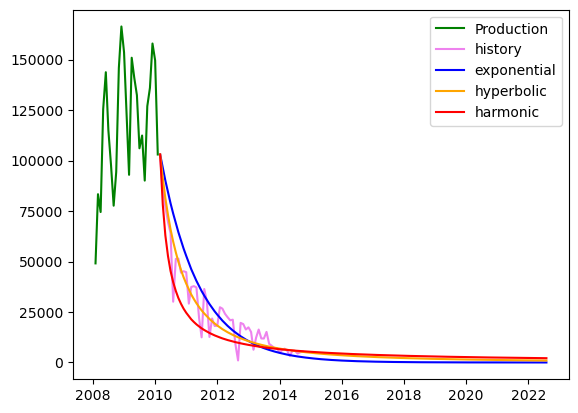

In [15]:
plt.plot(combined_df["month"],combined_df["Oil"],color="green")
plt.plot(combined_df["month"],combined_df["HOP"],color="violet")
plt.plot(combined_df["month"],combined_df["Exponential"],color="blue")
plt.plot(combined_df["month"],combined_df["Hyperbolic"],color="orange")
plt.plot(combined_df["month"],combined_df["Harmonic"],color="red")
plt.legend(["Production",'history','exponential','hyperbolic','harmonic'], loc='upper right')

In [16]:
combined_df.loc[0:Fp,'Exponential']=np.nan
combined_df

,month,Period,oil,Oil,HOP,Months,Exponential,Hyperbolic,Harmonic
0,2008-02-01,2008-02-01,49091.06,49091.06,NaN,NaN,NaN,NaN,NaN
1,2008-03-01,2008-03-01,83361.26,83361.26,NaN,NaN,NaN,NaN,NaN
2,2008-04-01,2008-04-01,74532.45,74532.45,NaN,NaN,NaN,NaN,NaN
3,2008-05-01,2008-05-01,125478.56,125478.56,NaN,NaN,NaN,NaN,NaN
4,2008-06-01,2008-06-01,143786.85,143786.85,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
170,2022-04-01,NaT,NaN,NaN,NaN,146.0,6.393554,1020.906369,2186.469956
171,2022-05-01,NaT,NaN,NaN,NaN,147.0,5.980357,1008.343784,2171.809828
172,2022-06-01,NaT,NaN,NaN,NaN,148.0,5.593864,996.011660,2157.344981
173,2022-07-01,NaT,NaN,NaN,NaN,149.0,5.232349,983.904394,2143.071538


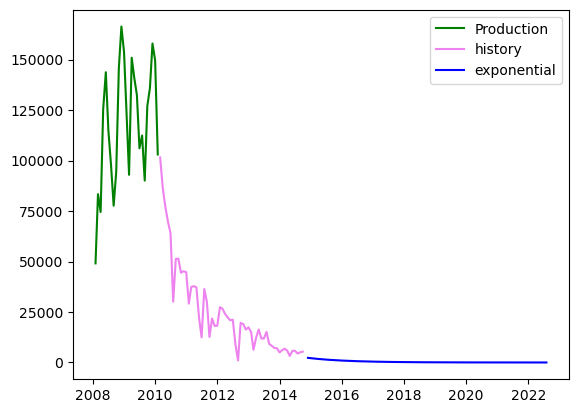

In [17]:
plt.plot(combined_df["month"],combined_df["Oil"],color="green")
plt.plot(combined_df["month"],combined_df["HOP"],color="violet")
plt.plot(combined_df["month"],combined_df["Exponential"],color="blue")

plt.legend(["Production",'history','exponential','hyperbolic','harmonic'], loc='upper right')

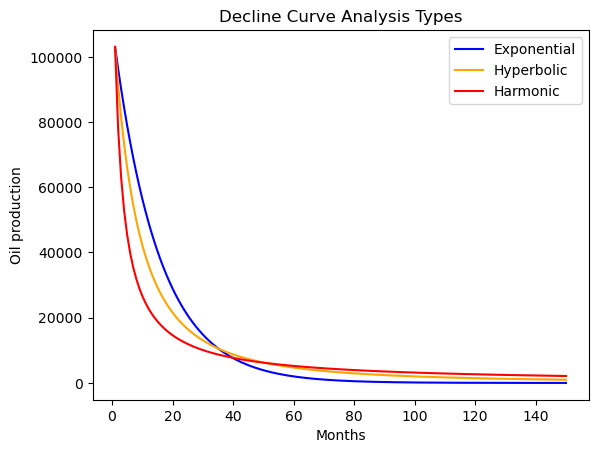

In [18]:
#plotting DCA Types
plt.plot(j["Months"],j["Exponential"],color="blue")
plt.plot(j["Months"],j["Hyperbolic"],color="Orange")
plt.plot(j["Months"],j["Harmonic"],color="red")

plt.xlabel('Months')
plt.ylabel('Oil production')
plt.title('Decline Curve Analysis Types')
plt.legend(['Exponential','Hyperbolic','Harmonic'], loc='best')